In [1]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

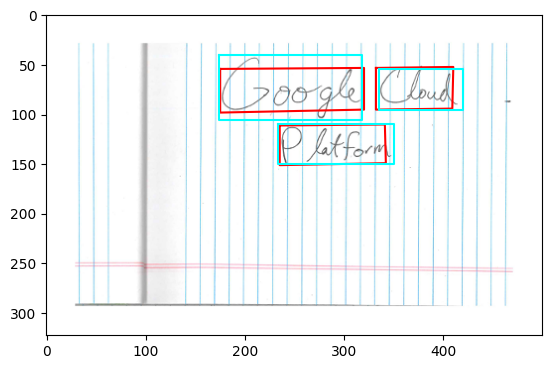

In [13]:
img = open("test1.png", "rb")
read_response = computervision_client.read_in_stream(
    image=img,
    mode="Printed",
    raw=True
)

operation_id = read_response.headers['Operation-Location'].split('/')[-1]
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open('test1.png')

fig, ax = plt.subplots()
ax.imshow(im)

if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            for word in line.words:
                xs = word.bounding_box[::2] + [word.bounding_box[0]]
                ys = word.bounding_box[1::2] + [word.bounding_box[1]]
                ax.plot(xs, ys, color="red")

ax.plot([174, 174, 318, 318, 174], [40, 105, 105, 40, 40], color="aqua")
ax.plot([335, 335, 420, 420, 335], [54, 95, 95, 54, 54], color="aqua")
ax.plot([233, 233, 350, 350, 233], [110, 150, 150, 110, 110], color="aqua")
plt.show()


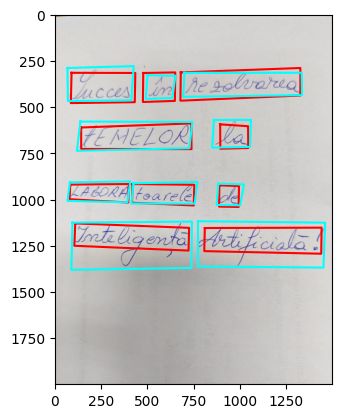

In [14]:
img = open("test2.jpeg", "rb")
read_response = computervision_client.read_in_stream(
    image=img,
    mode="Printed",
    raw=True
)

operation_id = read_response.headers['Operation-Location'].split('/')[-1]
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open('test2.jpeg')

fig, ax = plt.subplots()
ax.imshow(im)

if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            for word in line.words:
                xs = word.bounding_box[::2] + [word.bounding_box[0]]
                ys = word.bounding_box[1::2] + [word.bounding_box[1]]
                ax.plot(xs, ys, color="red")

ax.plot([68, 70, 413, 426, 68], [288, 467, 463, 278, 288], color="aqua")
ax.plot([501, 491, 635, 652, 501], [327, 455, 451, 330, 327], color="aqua")
ax.plot([701, 694, 1337, 1335, 701], [314, 444, 435, 314, 314], color="aqua")
ax.plot([138, 119, 727, 744, 138], [578, 736, 722, 580, 578], color="aqua")
ax.plot([860, 851, 1055, 1061, 860], [569, 719, 715, 569, 569], color="aqua")
ax.plot([81, 68, 392, 408, 81], [907, 1007, 1015, 902, 907], color="aqua")
ax.plot([425, 414, 756, 771, 425], [912, 1021, 1022, 905, 912], color="aqua")
ax.plot([884, 875, 1002, 1023, 884], [914, 1029, 1031, 918, 914], color="aqua")
ax.plot([95, 89, 739, 741, 95], [1125, 1380, 1370, 1119, 1125], color="aqua")
ax.plot([774, 774, 1453, 1462, 774], [1117, 1362, 1368, 1125, 1117], color="aqua")

plt.show()